# Rolling et Expanding

Une technique très courante avec les séries temporelles consiste à créer des données à partir d'une moyenne mobile. Regardons comment faire cela facilement avec pandas !

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# La meilleure façon de lire les données avec l'index des séries temporelles !
df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215

<AxesSubplot:xlabel='Date'>

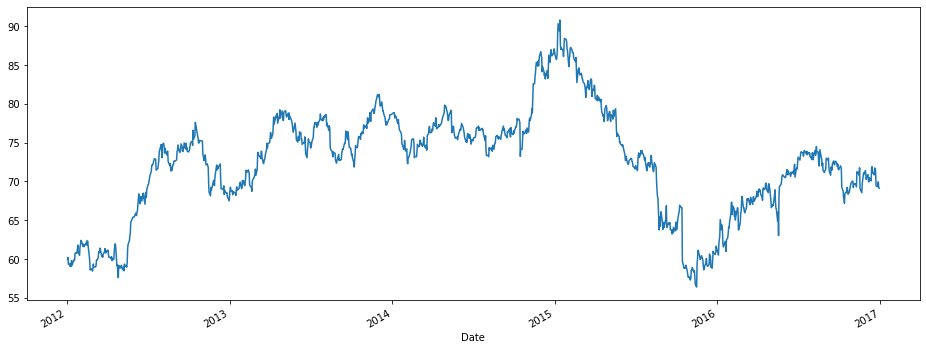

In [4]:
df['Open'].plot(figsize=(16,6))

Maintenant, ajoutons une moyenne glissante ! Cette méthode de roulement (rolling) fournit des entrées de lignes, où chaque entrée est alors représentative de la période. 

In [5]:
# Moyenne glissante sur 7 jours
df.rolling(7).mean().head(20)

Open       High        Low      Close        Volume  \
Date                                                                   
2012-01-03        NaN        NaN        NaN        NaN           NaN   
2012-01-04        NaN        NaN        NaN        NaN           NaN   
2012-01-05        NaN        NaN        NaN        NaN           NaN   
2012-01-06        NaN        NaN        NaN        NaN           NaN   
2012-01-09        NaN        NaN        NaN        NaN           NaN   
2012-01-10        NaN        NaN        NaN        NaN           NaN   
2012-01-11  59.495714  59.895714  59.074285  59.440000  9.007414e+06   
2012-01-12  59.469999  59.744285  59.007143  59.321429  8.231357e+06   
2012-01-13  59.322857  59.638571  58.941428  59.297143  7.965071e+06   
2012-01-17  59.397143  59.708571  59.105714  59.358572  7.355329e+06   
2012-01-18  59.450000  59.791428  59.217143  59.502857  7.047043e+06   
2012-01-19  59.578572  59.960000  59.335715  59.707143  7.412086e+06   
2012-01-20  59.767143  60.180000  59.577143  59.988571  7.908014e+06   
2012-01-23  60.017143  60.387143  59.787143  60.204285  8.017800e+06   
2012-01-24  60.154286  60.672857  59.979999  60.474285  8.035857e+06   
2012-01-25  60.440000  60.958572  60.270000  60.749999  7.776786e+06   
2012-01-26  60.715714  61.205714  60.448571  60.910000  7.624814e+06   
2012-01-27  60.868572  61.361429  60.575714  61.010000  7.678514e+06   
2012-01-30  60.945715  61.445714  60.661428  61.108571  7.450271e+06   
2012-01-31  61.057143  61.491429  60.648571  61.158571  7.362086e+06   

            Adj Close  
Date                   
2012-01-03        NaN  
2012-01-04        NaN  
2012-01-05        NaN  
2012-01-06        NaN  
2012-01-09        NaN  
2012-01-10        NaN  
2012-01-11  51.842984  
2012-01-12  51.739567  
2012-01-13  51.718386  
2012-01-17  51.771963  
2012-01-18  51.897808  
2012-01-19  52.075984  
2012-01-20  52.321443  
2012-01-23  52.509586  
2012-01-24  52.745077  
2012-01-25  52.985553  
2012-01-26  53.125103  
2012-01-27  53.212323  
2012-01-30  53.298295  
2012-01-31  53.341905

<AxesSubplot:xlabel='Date'>

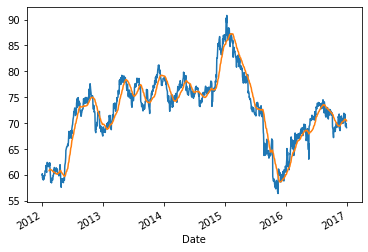

In [6]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot()

La façon la plus simple d'ajouter une légende est de faire de cette valeur de roulement une nouvelle colonne, puis pandas le fait automatiquement !

<AxesSubplot:xlabel='Date'>

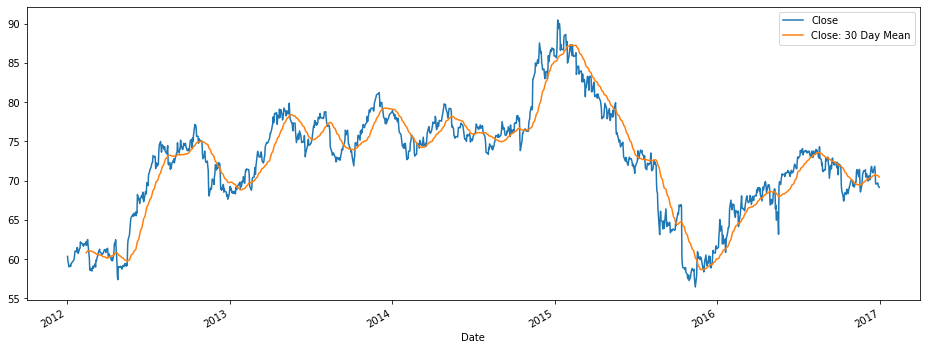

In [7]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

## expanding

Maintenant, que faire si vous voulez tout prendre en compte depuis le début de la série temporelle comme valeur mobile ? Par exemple, ne prendre pas seulement en compte une période de 7 jours, ou une moyenne mobile mensuelle, mais prendre en compte plutôt tout ce qui s'est passé depuis le début de la série temporelle, de façon continue :

<AxesSubplot:xlabel='Date'>

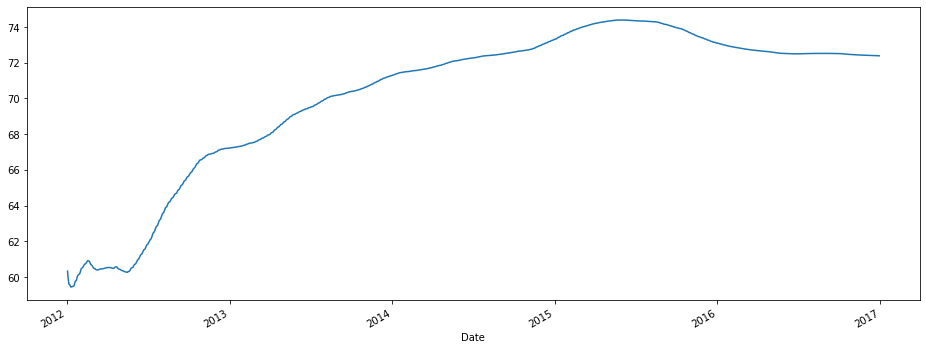

In [8]:
# Facultatif : spécifier un nombre minimum de périodes
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

## Les Bandes de Bollinger

Nous parlerons plus tard beaucoup plus des graphiques d'analyse financière et des indicateurs techniques, mais en voici un qui mérite d'être mentionné !

Plus d'informations : http://www.investopedia.com/terms/b/bollingerbands.asp

*Développées par John Bollinger, les Bandes de Bollinger® sont des bandes de volatilité placées au-dessus et au-dessous d'une moyenne mobile. La volatilité est basée sur l'écart-type, qui change au fur et à mesure que la volatilité augmente et diminue. Les bandes s'élargissent automatiquement lorsque la volatilité augmente et se rétrécissent lorsque la volatilité diminue. Cette nature dynamique des Bandes de Bollinger permet également de les utiliser sur différents titres avec les paramètres standards. Pour les signaux, les Bandes de Bollinger peuvent être utilisées pour identifier les valeurs hautes et les valeurs basses ou pour déterminer la force de la tendance.*

*Les Bandes de Bollinger reflètent la direction avec la SMA (Moyenne Mobile Simple) à 20 périodes et la volatilité avec les bandes supérieures/inférieures. Elles peuvent donc être utilisées pour déterminer si les prix sont relativement élevés ou bas. Selon Bollinger, les bandes devraient contenir 88-89% d'action sur les prix, ce qui rend significatif un mouvement en dehors des bandes. Techniquement, les prix sont relativement élevés lorsqu'ils se situent au-dessus de la bande supérieure et relativement bas lorsqu'ils se situent en dessous de la bande inférieure. Cependant, un niveau relativement élevé ne doit pas être considéré comme une baisse ou un signal de vente. De même, un cours relativement bas ne doit pas être considéré comme haussier ou comme un signal d'achat. Les prix sont élevés ou bas pour une raison. Comme pour les autres indicateurs, les bandes de Bollinger ne sont pas destinées à être utilisées comme un outil autonome.*

<AxesSubplot:xlabel='Date'>

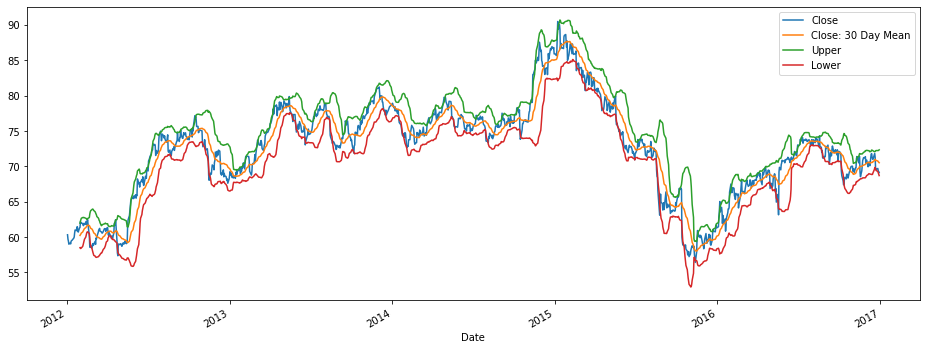

In [9]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 30 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 30 Day Mean'] - 2*df['Close'].rolling(window=20).std()
df[['Close','Close: 30 Day Mean','Upper','Lower']].plot(figsize=(16,6))

Pour les opérations d'expansion, il n'est pas très utile de visualiser cela par rapport aux données quotidiennes, mais c'est plutôt un bon moyen d'avoir une idée de la "stabilité" d'un titre. Cette idée de stabilité et de volatilité est quelque chose que nous allons explorer en profondeur dans le prochain projet, alors c'est parti !